# Множественная линейная регрессия на чистых данных

Содержание работы

Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).

1.Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк. Выведите первые строки датасета.

2.Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.

3.Для целевой и одного из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

4.Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [54]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv")

In [55]:
x.head()

,0.07184119218267622,0.8553524138064769,-0.3055966142959303,0.028252569993086545,1.8268953710701943
0,0.139521,-0.423507,0.461059,-0.447400,-0.034988
1,1.626311,-0.257622,-0.697520,1.413219,1.086292
2,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
3,-0.783365,-0.861232,0.951448,-0.117306,0.680597
4,3.077357,0.948615,-0.295527,1.390358,-0.116174


In [56]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv",
                header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",
                header=None)

In [57]:
x.shape, y.shape

((387, 5), (387, 1))

In [58]:
x.describe()

,0,1,2,3,4
count,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.080231,-0.023369,-0.094194,0.052474,0.067604
std,1.006557,1.008319,1.013547,0.996496,0.964922
min,-2.721942,-3.526587,-2.952847,-3.468134,-2.376103
25%,-0.505726,-0.606748,-0.731435,-0.594637,-0.582224
50%,0.064065,-0.006496,-0.123261,0.022809,-0.027389
75%,0.746176,0.602911,0.534841,0.750923,0.665682
max,3.077357,2.779463,2.959742,2.943178,3.626974


In [59]:
binary = LinearRegression()

In [60]:
binary.fit(x[[0]], y)

LinearRegression()

In [61]:
binary.coef_

array([[22.78111342]])

In [62]:
binary.predict(x[[0]])

array([[-2.42004238e+00],
       [-8.78210657e-01],
       [ 3.29925173e+01],
       [-3.10120198e+01],
       [-2.19025875e+01],
       [ 6.60489450e+01],
       [ 1.53292018e+00],
       [-9.48419200e+00],
       [-2.88367465e-01],
       [-4.69952278e+01],
       [-4.09231806e+01],
       [-2.70194581e+01],
       [ 1.17518386e+01],
       [-7.03559131e-02],
       [ 1.89831172e+01],
       [-1.16383540e+01],
       [-8.74458735e+00],
       [-4.09081352e+01],
       [-3.96006351e+01],
       [-8.11923054e+00],
       [ 1.70292960e+01],
       [-1.25041007e+00],
       [ 1.62900230e+01],
       [ 3.28798224e-01],
       [ 1.28098294e+00],
       [ 2.43481882e+01],
       [-3.11598811e+00],
       [ 6.01712725e+00],
       [ 2.86931625e+00],
       [ 1.17934534e+01],
       [ 2.87601089e+01],
       [ 4.68571901e+01],
       [ 1.33428473e+01],
       [ 1.28246961e+01],
       [-2.87904472e+01],
       [ 5.33892874e+00],
       [ 3.29446046e+00],
       [ 1.00257106e+01],
       [-5.9

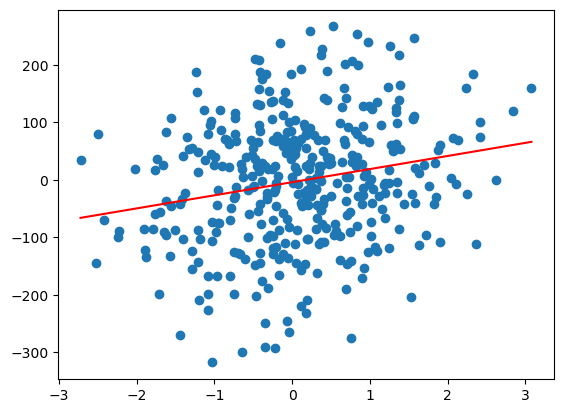

In [63]:
plt.scatter(x[0], y)
xx = np.linspace(x[0].min(), x[0].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

Предскажем значение целевой переменной

In [64]:
y_pred = binary.predict(x[[0]])

Оценим качество работы модели при помощи метрик

In [65]:
metrics.r2_score(y, y_pred)

0.04364336234689348

Значение метрики плохое(намного меньше 1) - модель работает плохо.

In [66]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

In [67]:
multiple.coef_

array([[15.79537523, 93.21521093, 37.19410687, 31.19129121, -0.23773114]])

In [68]:
y_pred =  multiple.predict(x)

In [69]:
metrics.r2_score(y, y_pred)

0.9922198026415868

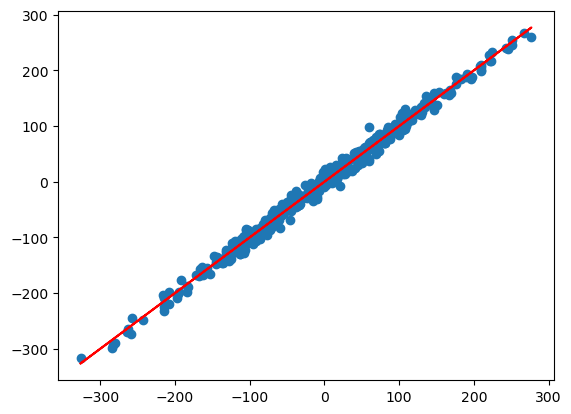

In [70]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

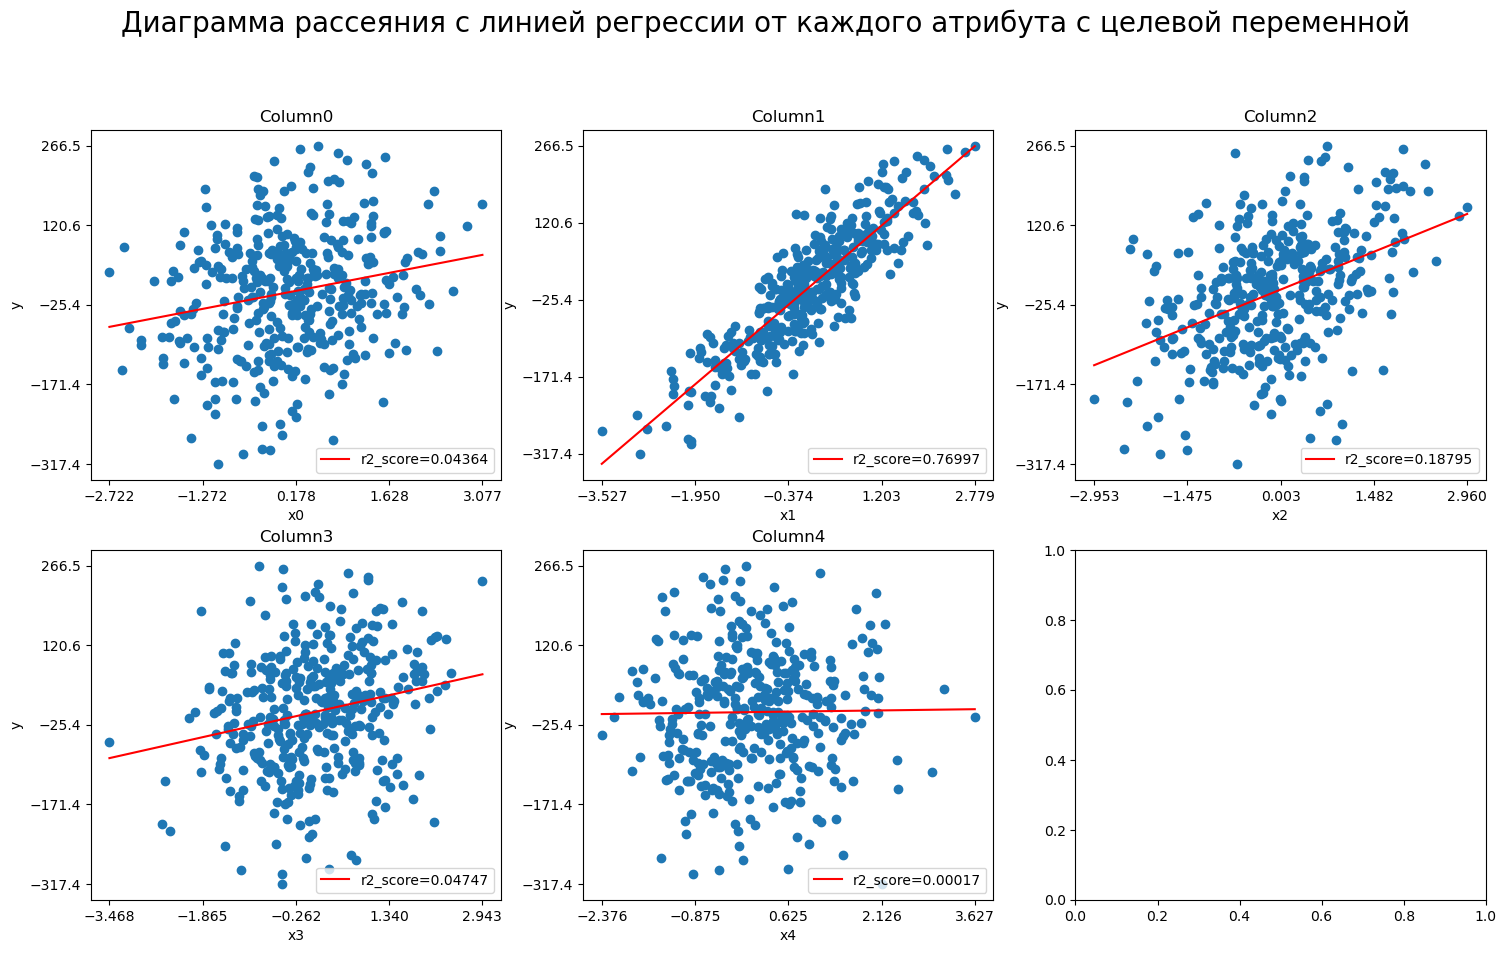

In [79]:
f, ax = plt.subplots(2, 3, figsize=(18,10))
f.suptitle("Диаграмма рассеяния с линией регрессии от каждого атрибута с целевой переменной",y = 1,fontsize=20)
ax = ax.ravel()
for i, col in enumerate(x.columns):
    X=[]
    X = np.linspace(x[i].min(), x[i].max(), len(x[i]))
    binary.fit(x[[i]], y)
    y_pred=binary.predict(x[[i]])
    ax[i].plot(X.reshape(-1, 1), binary.predict(X.reshape(-1, 1)), c='r', label='r2_score='+str("%.5f" % metrics.r2_score(y,y_pred)))
    ax[i].scatter(x[i], y)
    ax[i].set(title = 'Column' + str(col),xticks=np.linspace(x[i].min(), x[i].max(), 5), yticks=np.linspace(y.min(), y.max(), 5), xlabel='x' + str(col), ylabel='y')
    ax[i].legend(loc='lower right')
plt.show()

2. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [80]:
from sklearn.preprocessing import PolynomialFeatures

In [84]:
x_pf2= PolynomialFeatures(2).fit_transform(x[[0]])
x_pf2.shape

(387, 3)

In [86]:
binary = LinearRegression()

In [88]:
binary.fit(x_pf2,y)

LinearRegression()

In [89]:
binary.coef_

array([[ 0.        , 22.7008015 ,  0.40859094]])

In [98]:
binary.intercept_

array([-4.46574881])

In [94]:
y_pred=binary.predict(x_pf2)

In [95]:
metrics.r2_score(y,y_pred)

0.04367170367915485

In [96]:
metrics.mean_squared_error(y,y_pred)

11491.909255492801

3-его порядка

In [101]:
from sklearn.preprocessing import PolynomialFeatures
x_pf2= PolynomialFeatures(3).fit_transform(x[[0]])
x_pf2.shape
binary = LinearRegression()
binary.fit(x_pf2,y)
binary.coef_
binary.intercept_
y_pred=binary.predict(x_pf2)

In [102]:
metrics.r2_score(y,y_pred)

0.04376506816920167

In [103]:
metrics.mean_squared_error(y,y_pred)

11490.787322521215

10-ого

In [105]:
from sklearn.preprocessing import PolynomialFeatures
x_pf2= PolynomialFeatures(10).fit_transform(x[[0]])
x_pf2.shape
binary = LinearRegression()
binary.fit(x_pf2,y)
binary.coef_
binary.intercept_
y_pred=binary.predict(x_pf2)

In [106]:
metrics.r2_score(y,y_pred)

0.05035596325168745

In [107]:
metrics.mean_squared_error(y,y_pred)

11411.586520357572

3. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

4. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

5. (*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

In [108]:
from sklearn.preprocessing import PolynomialFeatures
x_pf2= PolynomialFeatures(10).fit_transform(x)
x_pf2.shape
binary = LinearRegression()
binary.fit(x_pf2,y)
binary.coef_
binary.intercept_
y_pred=binary.predict(x_pf2)

In [109]:
metrics.r2_score(y,y_pred)

1.0

In [110]:
metrics.mean_squared_error(y,y_pred)

1.2701103484282335e-18